In [122]:
import pandas as pd
import numpy as np

问题1.1：分析这些玻璃文物表面风化与纹饰、类型、颜色的关系；

In [123]:
data=pd.read_excel('附件.xlsx',sheet_name='表单1')
data.head()

,文物编号,纹饰,类型,颜色,表面风化
0,1,C,高钾,蓝绿,无风化
1,2,A,铅钡,浅蓝,风化
2,3,A,高钾,蓝绿,无风化
3,4,A,高钾,蓝绿,无风化
4,5,A,高钾,蓝绿,无风化


In [124]:
data.columns

Index(['文物编号', '纹饰', '类型', '颜色', '表面风化'], dtype='object')

In [125]:
data.describe()

,文物编号
count,58.000000
mean,29.500000
std,16.886879
min,1.000000
25%,15.250000
50%,29.500000
75%,43.750000
max,58.000000


我们可以看到共有58个文物

In [126]:
data.isnull().sum()

文物编号    0
纹饰      0
类型      0
颜色      4
表面风化    0
dtype: int64

我们注意我们有空值，填充空值,并输出为1.1.xlsx

In [127]:
data.dropna().to_excel('1.1.xlsx',index=None)

现在我的想法是对于这几个指标进行相关性分析和差异性分析
首先尝试一下差异性分析

算法：卡方检验分析
变量：变量Y:{表面风化}；变量X:{类型，颜色，纹饰}
首先我们先对其中的数据进行数值化

In [128]:
data = pd.read_excel("1.1.xlsx")
data.head()

,文物编号,纹饰,类型,颜色,表面风化
0,1,C,高钾,蓝绿,无风化
1,2,A,铅钡,浅蓝,风化
2,3,A,高钾,蓝绿,无风化
3,4,A,高钾,蓝绿,无风化
4,5,A,高钾,蓝绿,无风化


In [129]:
## labelencoder
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
data["纹饰"] = LabelEncoder().fit_transform(np.array(data["纹饰"])).reshape(-1,1)
data["表面风化"] = LabelEncoder().fit_transform(np.array(data["表面风化"])).reshape(-1,1)
data["类型"] = LabelEncoder().fit_transform(np.array(data["类型"])).reshape(-1,1)
data["颜色"] = LabelEncoder().fit_transform(np.array(data["颜色"])).reshape(-1,1)
data.head()

,文物编号,纹饰,类型,颜色,表面风化
0,1,2,1,6,0
1,2,0,0,1,1
2,3,0,1,6,0
3,4,0,1,6,0
4,5,0,1,6,0


但是如果这样的话，对于高钾和铅钡，不能一概地用0，1去表示，所以我们尝试对于表格的数据进行0，1化，得到1.2.xlsx

In [130]:
data = pd.read_excel("1.2.xlsx")
data.head()

,纹饰_A,纹饰_B,纹饰_C,类型_铅钡,类型_高钾,颜色_浅绿,颜色_浅蓝,颜色_深绿,颜色_深蓝,颜色_紫,颜色_绿,颜色_蓝绿,颜色_黑,表面风化_无风化,表面风化_风化,氧化钠(Na2O)
0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0.0
1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0.0
2,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0.0
3,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0.0
4,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0.0


首先对于纹饰进行卡方分析

In [131]:
data1= data[["纹饰_A","纹饰_B","纹饰_C","表面风化_风化","表面风化_无风化"]]
data1.head()

,纹饰_A,纹饰_B,纹饰_C,表面风化_风化,表面风化_无风化
0,0,0,1,0,1
1,1,0,0,1,0
2,1,0,0,0,1
3,1,0,0,0,1
4,1,0,0,0,1


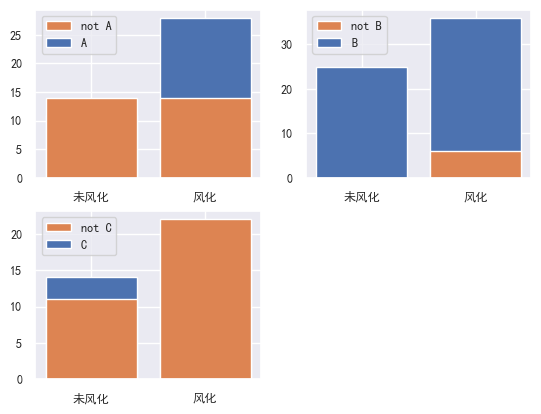

In [132]:
## 探索性绘图
import matplotlib.pyplot as plt
import seaborn as sns
a_table = pd.crosstab(data["纹饰_A"],data["表面风化_风化"],margins=True)
b_table = pd.crosstab(data["纹饰_B"],data["表面风化_风化"],margins=True)
c_table = pd.crosstab(data["纹饰_C"],data["表面风化_风化"],margins=True)
list1 = [a_table,b_table,c_table]

# 创建图像窗口
plt.figure()
# 创建子图
j=1
list2 = ["not A","A","not B","B","not C","C"]
for i in list1:
    plt.subplot(2,2,j)
    sns.set(font_scale=0.8)
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
    plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
    sns.set(font='SimHei', font_scale=0.8)        # 解决Seaborn中文显示问题

    categories = ["未风化","风化"]
    count_n = i.iloc[0][0:2].values
    count_y = i.iloc[1][0:2].values
    p1 = plt.bar(categories,count_n)
    p2 = plt.bar(categories,count_y)
    plt.legend((p2[0],p1[0]),(list2[2*j-2],list2[2*j-1]))
    j+=1
# 展示图片  
plt.show()
# data["纹饰_A"].value_counts()
# categories = ["风化","未风化"]
# len(data1[(data1["纹饰_A"]==1)&(data1["表面风化_风化"])])


我们尝试写一下卡方检验，使用scipy进行，其中返回值chi2检验统计量，p-value,dof自由度，expected预期频率

In [133]:
from scipy import stats
j=1
for ob in list1:
    f_ob = np.array([ob.iloc[0][0:2].values,ob.iloc[1][0:2].values])
    print(list2[2*j-1],"p值",stats.chi2_contingency(f_ob))
    j+=1


A p值 (2.443709009244722, 0.11799692869246177, 1, array([[14.55223881, 24.44776119],
       [10.44776119, 17.55223881]]))
B p值 (2.3662262555295337, 0.12398645179156087, 1, array([[22.76119403, 38.23880597],
       [ 2.23880597,  3.76119403]]))
C p值 (0.16892178083354534, 0.6810718381630008, 1, array([[12.68656716, 21.31343284],
       [12.31343284, 20.68656716]]))


重复上述过程对于颜色，类型进行检验

In [134]:
data2 = data[["类型_高钾","表面风化_风化"]]
data2.head()

,类型_高钾,表面风化_风化
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


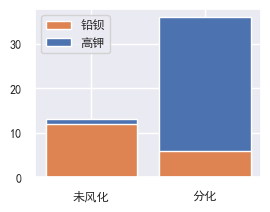

In [135]:
a_table = pd.crosstab(data["类型_高钾"],data["表面风化_风化"],margins=True)

list1 = [a_table]

# 创建图像窗口
plt.figure()
# 创建子图
j=1
list2 = ["铅钡","高钾"]
for i in list1:
    plt.subplot(2,2,j)
    sns.set(font_scale=0.8)
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
    plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
    sns.set(font='SimHei', font_scale=0.8)        # 解决Seaborn中文显示问题

    categories = ["未风化","分化"]
    count_n = i.iloc[0][0:2].values
    count_y = i.iloc[1][0:2].values
    p1 = plt.bar(categories,count_n)
    p2 = plt.bar(categories,count_y)
    plt.legend((p2[0],p1[0]),(list2[2*j-2],list2[2*j-1]))
    j+=1
# 展示图片  
plt.show()

In [136]:
from scipy import stats
j=1
for ob in list1:
    f_ob = np.array([ob.iloc[0][0:2].values,ob.iloc[1][0:2].values])
    print(list2[2*j-1],"p值",stats.chi2_contingency(f_ob))
    j+=1

高钾 p值 (7.431440179246302, 0.00640940260513365, 1, array([[18.28358209, 30.71641791],
       [ 6.71641791, 11.28358209]]))


In [137]:
data

,纹饰_A,纹饰_B,纹饰_C,类型_铅钡,类型_高钾,颜色_浅绿,颜色_浅蓝,颜色_深绿,颜色_深蓝,颜色_紫,颜色_绿,颜色_蓝绿,颜色_黑,表面风化_无风化,表面风化_风化,氧化钠(Na2O)
0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0.00
1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0.00
2,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0.00
3,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0.00
4,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0.00
63,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,2.71
64,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0.00
65,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0.00


In [138]:
data.columns

Index(['纹饰_A', '纹饰_B', '纹饰_C', '类型_铅钡', '类型_高钾', '颜色_浅绿', '颜色_浅蓝', '颜色_深绿',
       '颜色_深蓝', '颜色_紫', '颜色_绿', '颜色_蓝绿', '颜色_黑', '表面风化_无风化', '表面风化_风化',
       '氧化钠(Na2O)'],
      dtype='object')

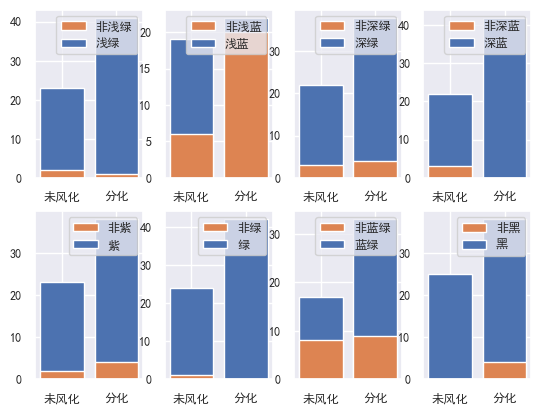

In [139]:
data3 = data[["颜色_浅绿","颜色_浅蓝","颜色_深绿","颜色_深蓝","颜色_紫","颜色_绿","颜色_蓝绿","颜色_黑","表面风化_风化"]]
table1 = pd.crosstab(data["颜色_浅绿"],data["表面风化_风化"],margins=True)
table2 = pd.crosstab(data["颜色_浅蓝"],data["表面风化_风化"],margins=True)
table3 = pd.crosstab(data["颜色_深绿"],data["表面风化_风化"],margins=True)
table4 = pd.crosstab(data["颜色_深蓝"],data["表面风化_风化"],margins=True)
table5 = pd.crosstab(data["颜色_紫"],data["表面风化_风化"],margins=True)
table6 = pd.crosstab(data["颜色_绿"],data["表面风化_风化"],margins=True)
table7 = pd.crosstab(data["颜色_蓝绿"],data["表面风化_风化"],margins=True)
table8 = pd.crosstab(data["颜色_黑"],data["表面风化_风化"],margins=True)

list1 = [table1,table2,table3,table4,table5,table6,table7,table8]

# 创建图像窗口
plt.figure()
# 创建子图
j=1
list2 = ["非浅绿","浅绿","非浅蓝","浅蓝","非深绿","深绿","非深蓝","深蓝","非紫","紫","非绿","绿","非蓝绿","蓝绿","非黑","黑"]
for i in list1:
    plt.subplot(2,4,j)
    sns.set(font_scale=0.8)
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
    plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
    sns.set(font='SimHei', font_scale=0.8)        # 解决Seaborn中文显示问题

    categories = ["未风化","分化"]
    count_n = i.iloc[0][0:2].values
    count_y = i.iloc[1][0:2].values
    p1 = plt.bar(categories,count_n)
    p2 = plt.bar(categories,count_y)
    plt.legend((p2[0],p1[0]),(list2[2*j-2],list2[2*j-1]))
    j+=1
# 展示图片  
plt.show()

In [140]:
from scipy import stats
j=1
for ob in list1:
    f_ob = np.array([ob.iloc[0][0:2].values,ob.iloc[1][0:2].values])
    print(list2[2*j-1],"p值",stats.chi2_contingency(f_ob))
    j+=1

浅绿 p值 (0.21610491071428584, 0.6420239438865225, 1, array([[23.88059701, 40.11940299],
       [ 1.11940299,  1.88059701]]))
浅蓝 p值 (2.7541202090592325, 0.09700416450588568, 1, array([[15.29850746, 25.70149254],
       [ 9.70149254, 16.29850746]]))
深绿 p值 (0.0, 1.0, 1, array([[22.3880597, 37.6119403],
       [ 2.6119403,  4.3880597]]))
深蓝 p值 (2.8435949900793656, 0.09173875598809793, 1, array([[23.88059701, 40.11940299],
       [ 1.11940299,  1.88059701]]))
紫 p值 (0.0, 1.0, 1, array([[22.76119403, 38.23880597],
       [ 2.23880597,  3.76119403]]))
绿 p值 (0.06985209235209233, 0.7915522551684074, 1, array([[24.62686567, 41.37313433],
       [ 0.37313433,  0.62686567]]))
蓝绿 p值 (0.450889355742297, 0.5019129158294906, 1, array([[18.65671642, 31.34328358],
       [ 6.34328358, 10.65671642]]))
黑 p值 (1.1197685185185184, 0.28996830334688095, 1, array([[23.50746269, 39.49253731],
       [ 1.49253731,  2.50746269]]))


下面我们进行相关性分析：使用spearman相关系数

In [141]:
df = pd.read_excel("1.1.xlsx")



In [142]:
df2 = df[["纹饰","类型","颜色","表面风化"]]
df2["纹饰"] = LabelEncoder().fit_transform(np.array(df2["纹饰"])).reshape(-1,1)
df2["表面风化"] = LabelEncoder().fit_transform(np.array(df2["表面风化"])).reshape(-1,1)
df2["类型"] = LabelEncoder().fit_transform(np.array(df2["类型"])).reshape(-1,1)
df2["颜色"] = LabelEncoder().fit_transform(np.array(df2["颜色"])).reshape(-1,1)

print(df2.corr('spearman'))

            纹饰        类型        颜色      表面风化
纹饰    1.000000 -0.134535 -0.223416  0.047862
类型   -0.134535  1.000000  0.412708 -0.316228
颜色   -0.223416  0.412708  1.000000  0.069605
表面风化  0.047862 -0.316228  0.069605  1.000000


C:\Users\zyy\AppData\Local\Temp\ipykernel_12844\2616648597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["纹饰"] = LabelEncoder().fit_transform(np.array(df2["纹饰"])).reshape(-1,1)
C:\Users\zyy\AppData\Local\Temp\ipykernel_12844\2616648597.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["表面风化"] = LabelEncoder().fit_transform(np.array(df2["表面风化"])).reshape(-1,1)
C:\Users\zyy\AppData\Local\Temp\ipykernel_12844\2616648597.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

<AxesSubplot:>

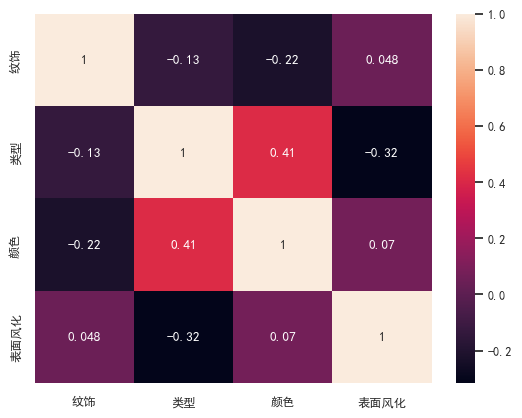

In [143]:
spearman_matrix = df2.corr('spearman')
sns.heatmap(spearman_matrix, annot=True)

问题1.2：基于这些玻璃文物的类型，分析文物样品表面有无风化化学成分含量的统计规律；

In [144]:
data2=pd.read_excel('附件.xlsx',sheet_name='表单2')
data=pd.read_excel('附件.xlsx',sheet_name='表单1')

In [145]:
data2.head()

,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,01,69.33,NaN,9.99,6.32,0.87,3.93,1.74,3.87,NaN,NaN,1.17,NaN,NaN,0.39
1,02,36.28,NaN,1.05,2.34,1.18,5.73,1.86,0.26,47.43,NaN,3.57,0.19,NaN,NaN
2,03部位1,87.05,NaN,5.19,2.01,NaN,4.06,NaN,0.78,0.25,NaN,0.66,NaN,NaN,NaN
3,03部位2,61.71,NaN,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,NaN,NaN
4,04,65.88,NaN,9.67,7.12,1.56,6.44,2.06,2.18,NaN,NaN,0.79,NaN,NaN,0.36


In [146]:
data2['文物编号']=data2['文物采样点'].apply(lambda x:int(str(x)[:2]))

在缺失值处理时，使用众数填充数据集众数不唯一，如果直接使用mode()填充很可能导致填充失败，所以要再mode()后加上一个索引[0]。我们把原来要删去的颜色填充为众数，进行进一步分析

In [147]:
data['颜色'].fillna(data['颜色'].mode()[0],inplace=True)
data

,文物编号,纹饰,类型,颜色,表面风化
0,1,C,高钾,蓝绿,无风化
1,2,A,铅钡,浅蓝,风化
2,3,A,高钾,蓝绿,无风化
3,4,A,高钾,蓝绿,无风化
4,5,A,高钾,蓝绿,无风化
5,6,A,高钾,蓝绿,无风化
6,7,B,高钾,蓝绿,风化
7,8,C,铅钡,紫,风化
8,9,B,高钾,蓝绿,风化
9,10,B,高钾,蓝绿,风化


In [148]:
data2.head()

,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),文物编号
0,01,69.33,NaN,9.99,6.32,0.87,3.93,1.74,3.87,NaN,NaN,1.17,NaN,NaN,0.39,1
1,02,36.28,NaN,1.05,2.34,1.18,5.73,1.86,0.26,47.43,NaN,3.57,0.19,NaN,NaN,2
2,03部位1,87.05,NaN,5.19,2.01,NaN,4.06,NaN,0.78,0.25,NaN,0.66,NaN,NaN,NaN,3
3,03部位2,61.71,NaN,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,NaN,NaN,3
4,04,65.88,NaN,9.67,7.12,1.56,6.44,2.06,2.18,NaN,NaN,0.79,NaN,NaN,0.36,4


In [149]:
data2.isnull().sum()

文物采样点           0
二氧化硅(SiO2)      0
氧化钠(Na2O)      50
氧化钾(K2O)       28
氧化钙(CaO)        8
氧化镁(MgO)       25
氧化铝(Al2O3)      1
氧化铁(Fe2O3)     24
氧化铜(CuO)        5
氧化铅(PbO)       11
氧化钡(BaO)       16
五氧化二磷(P2O5)    10
氧化锶(SrO)       23
氧化锡(SnO2)      62
二氧化硫(SO2)      61
文物编号            0
dtype: int64

In [150]:
data2.fillna(0,inplace=True) ## 填充空缺

In [151]:
data2.isnull().sum() ## 检查一遍

文物采样点          0
二氧化硅(SiO2)     0
氧化钠(Na2O)      0
氧化钾(K2O)       0
氧化钙(CaO)       0
氧化镁(MgO)       0
氧化铝(Al2O3)     0
氧化铁(Fe2O3)     0
氧化铜(CuO)       0
氧化铅(PbO)       0
氧化钡(BaO)       0
五氧化二磷(P2O5)    0
氧化锶(SrO)       0
氧化锡(SnO2)      0
二氧化硫(SO2)      0
文物编号           0
dtype: int64

In [152]:
# 为了防止02部位1,2的影响，我们将两个表merge一下
data_merge=pd.merge(data,data2,on="文物编号")
data_merge

,文物编号,纹饰,类型,颜色,表面风化,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,1,C,高钾,蓝绿,无风化,01,69.33,0.00,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39
1,2,A,铅钡,浅蓝,风化,02,36.28,0.00,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00
2,3,A,高钾,蓝绿,无风化,03部位1,87.05,0.00,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00
3,3,A,高钾,蓝绿,无风化,03部位2,61.71,0.00,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00
4,4,A,高钾,蓝绿,无风化,04,65.88,0.00,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,54,C,铅钡,浅蓝,风化,54严重风化点,17.11,0.00,0.00,0.00,1.11,3.65,0.00,1.34,58.46,0.00,14.13,1.12,0.0,0.00
65,55,C,铅钡,绿,无风化,55,49.01,2.71,0.00,1.13,0.00,1.45,0.00,0.86,32.92,7.95,0.35,0.00,0.0,0.00
66,56,C,铅钡,蓝绿,风化,56,29.15,0.00,0.00,1.21,0.00,1.85,0.00,0.79,41.25,15.45,2.54,0.00,0.0,0.00
67,57,C,铅钡,蓝绿,风化,57,25.42,0.00,0.00,1.31,0.00,2.18,0.00,1.16,45.10,17.30,0.00,0.00,0.0,0.00
